## Load The Data

In [2]:
import numpy as np

train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")
train_data_noisy = np.load("train_data_noisy.npy")
test_data_noisy = np.load("test_data_noisy.npy")

## Autoencoder Model Architechture

![encoder image](image1.jpg)


![encoder image](image2.jpg)


In [6]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


# Define input layer
input_layer = Input(shape=(28, 28, 1))  

# Encoder layers
encoder_layer1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
encoder_layer2 = MaxPooling2D((2,2), padding='same')(encoder_layer1)
encoder_layer3 = Conv2D(32, (3,3), activation='relu', padding='same')(encoder_layer2)
encoder = MaxPooling2D((2,2), padding='same')(encoder_layer3)

# Decoder layers 
decoder_layer1 = Conv2D(32, (3,3), activation='relu', padding='same')(encoder)
decoder_layer2 = UpSampling2D((2,2))(decoder_layer1)
decoder_layer3 = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_layer2)
decoder_layer4 = UpSampling2D((2,2))(decoder_layer3)

decoder = Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoder_layer4)

# Define autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = autoencoder.fit(train_data_noisy, train_data, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - loss: 0.1723 - val_loss: 0.1073
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.1053 - val_loss: 0.1025
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.1008 - val_loss: 0.1001
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 0.0990 - val_loss: 0.0984
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - loss: 0.0977 - val_loss: 0.0978
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.0971 - val_loss: 0.0971
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.0963 - val_loss: 0.0969
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 0.0960 - val_loss: 0.0964
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 0.0956 - val_loss: 0.0965
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0954 - val_loss: 0.0962


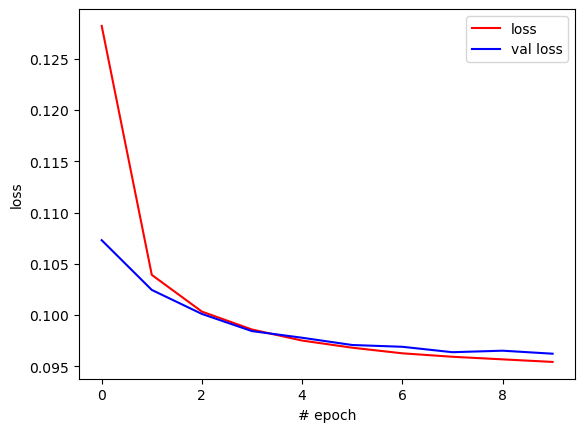

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val loss')
plt.legend()
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.show()

In [9]:
autoencoder.save('autoencoders_noise_removal.keras')
autoencoder.save('autoencoders_noise_removal.h5')  

In [10]:
autoencoder.save_weights('autoencoders_noise_removal_weights.weights.h5')